# Kindi Krishna Nikhil -BL.EN.U4AIE21068
# Lab-4

# A1.Use numpy.fft.fft()to transform the speech signal to its spectral domain. Please plot the amplitude part of the spectral components and observe it.

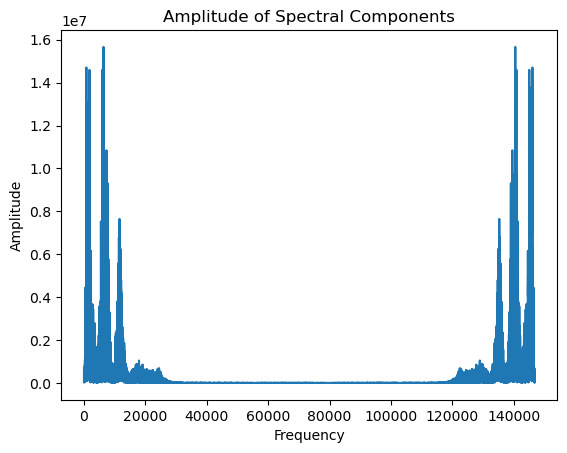

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import spectrogram

# Load the speech signal from the WAV file
fs, speech_signal = wavfile.read("nikhil.wav")

# A1. Transform the speech signal to its spectral domain using numpy.fft.fft()
spectral_components = np.fft.fft(speech_signal)

# Plot the amplitude part of the spectral components
plt.plot(np.abs(spectral_components))
plt.title('Amplitude of Spectral Components')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()

# A2. Use numpy.fft.ifft()to inverse transform the frequency spectrum of the speech signal from frequency domain to time domain. Compare the generated time domain signal with the original signal.

In [5]:
import numpy as np
import scipy.io.wavfile as wavfile

sample_rate, original_signal = wavfile.read('nikhil.wav')

frequency_spectrum = np.fft.fft(original_signal)

time_domain_signal = np.fft.ifft(frequency_spectrum)

mse = np.mean((original_signal - time_domain_signal) ** 2)

print("Mean Squared Error between original and reconstructed signals:", mse)

Mean Squared Error between original and reconstructed signals: (5.928197233948492e-25+1.8579895658182595e-26j)


C:\Users\Krishna Nikhil\.conda\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


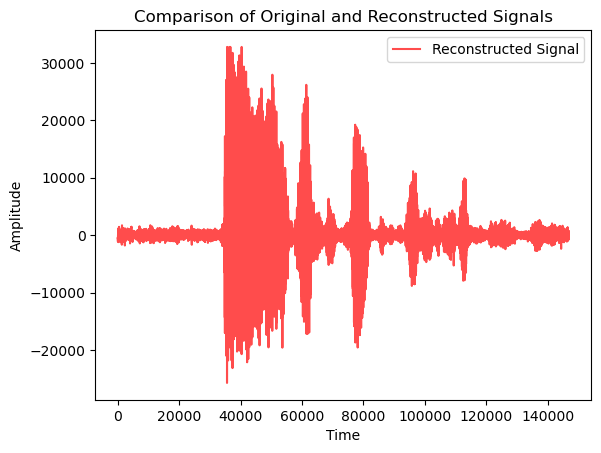

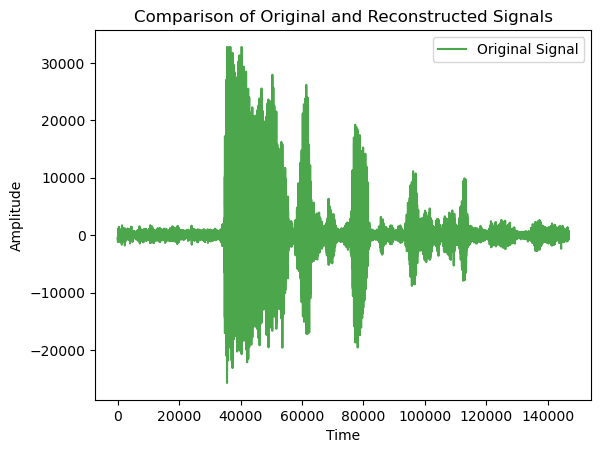

In [4]:
reconstructed_signal = np.fft.ifft(spectral_components)

# Compare the generated time domain signal with the original signal

plt.plot(reconstructed_signal, label='Reconstructed Signal', alpha=0.7, color = "red")
plt.title('Comparison of Original and Reconstructed Signals')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()


plt.plot(speech_signal, label='Original Signal', alpha=0.7, color = "green")
plt.title('Comparison of Original and Reconstructed Signals')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

# A3. Perform the spectral analysis of a word present in the recorded speech. Compare the spectrum with the spectrum of the full signal.

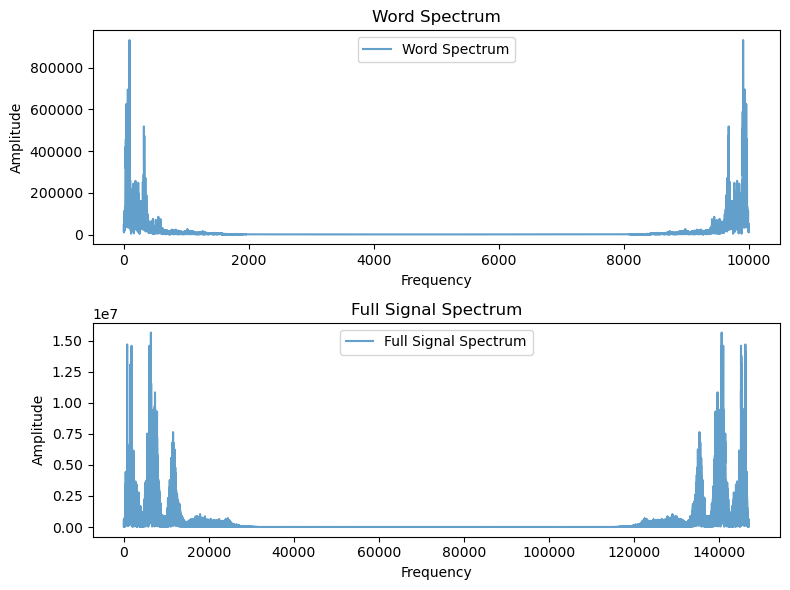

In [11]:
start_index = 10000  # Define start index for the word
end_index = 20000    # Define end index for the word
word_signal = speech_signal[start_index:end_index]
word_spectrum = np.fft.fft(word_signal)

# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(8, 6))

# Plot the word spectrum
axes[0].plot(np.abs(word_spectrum), label='Word Spectrum', alpha=0.7)
axes[0].set_title('Word Spectrum')
axes[0].set_xlabel('Frequency')
axes[0].set_ylabel('Amplitude')
axes[0].legend()

# Plot the full signal spectrum
axes[1].plot(np.abs(spectral_components), label='Full Signal Spectrum', alpha=0.7)
axes[1].set_title('Full Signal Spectrum')
axes[1].set_xlabel('Frequency')
axes[1].set_ylabel('Amplitude')
axes[1].legend()

plt.tight_layout()
plt.show()

# A4. Take a rectangular window of 20 mili-second sampled at 22.5 KHz. Using FFT, analyse the spectral components.

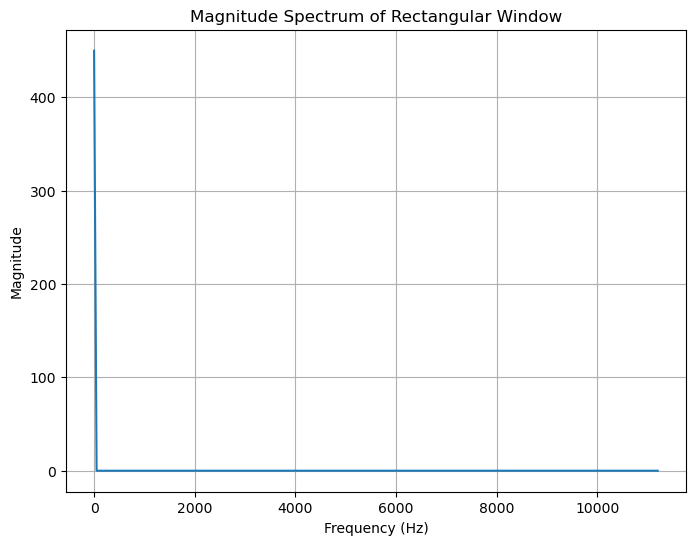

In [23]:
import numpy as np
import matplotlib.pyplot as plt

sampling_rate = 22500  # Hz
window_length = 20e-3  # seconds (20 milliseconds)

num_samples = int(window_length * sampling_rate)
rectangular_window = np.ones(num_samples)
frequency_spectrum = np.fft.fft(rectangular_window)
frequency_axis = np.fft.fftfreq(num_samples, d=1/sampling_rate)

# Plot the magnitude spectrum
plt.figure(figsize=(8, 6))
plt.plot(frequency_axis[:num_samples//2], np.abs(frequency_spectrum[:num_samples//2]))
plt.title('Magnitude Spectrum of Rectangular Window')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()


# A5. Break your speech signal into window lengths of 20 mSec intervals.Evaluate the frequency components using numpy.fft.rfft(). Stack these frequency components as columns in a matrix. Use heatmap plot to display the matrix.You may use librosa.stft()or scipy.signal.stft()as well to achieve this.

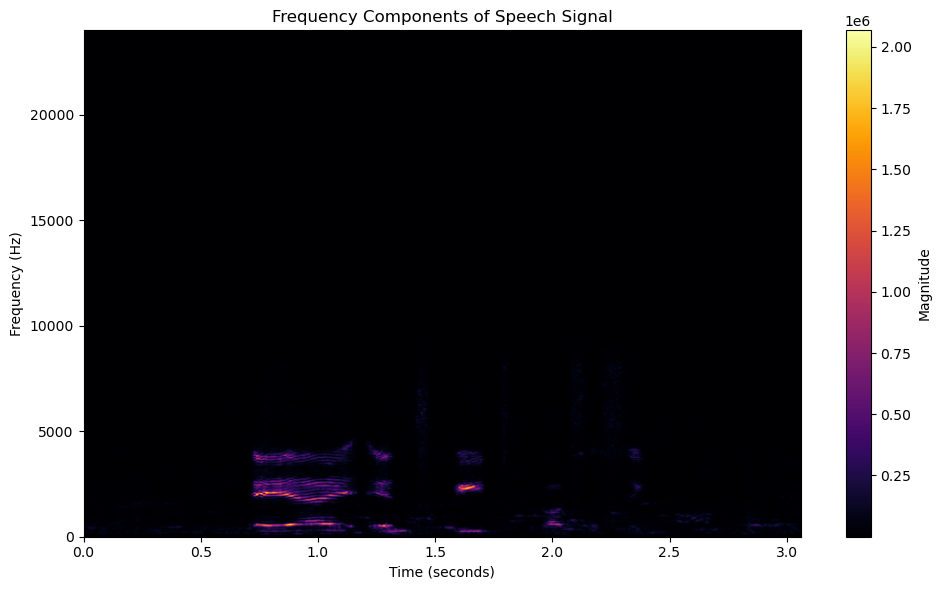

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wavfile


sample_rate, speech_signal = wavfile.read('nikhil.wav')
window_length_ms = 20  # milliseconds
window_length_samples = int(window_length_ms * sample_rate / 1000)  # convert milliseconds to samples
overlap_samples = window_length_samples // 2  # 50% overlap

num_windows = (len(speech_signal) - window_length_samples) // overlap_samples + 1
frequency_matrix = np.zeros((window_length_samples // 2 + 1, num_windows))

# Evaluate frequency components for each window
for i in range(num_windows):
    window_start = i * overlap_samples
    window_end = window_start + window_length_samples
    window = np.hamming(window_length_samples) * speech_signal[window_start:window_end]
    fft_result = np.fft.rfft(window)
    frequency_matrix[:, i] = np.abs(fft_result)

# Plot the frequency components using a heatmap
plt.figure(figsize=(10, 6))
plt.imshow(frequency_matrix, aspect='auto', extent=[0, len(speech_signal) / sample_rate, 0, sample_rate / 2], cmap='inferno', origin='lower')
plt.colorbar(label='Magnitude')
plt.title('Frequency Components of Speech Signal')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency (Hz)')
plt.tight_layout()
plt.show()


# A6. Use scipy.signal.spectrogram()to plot the spectrogram of the speech signal at the same duration. Compare the plots.

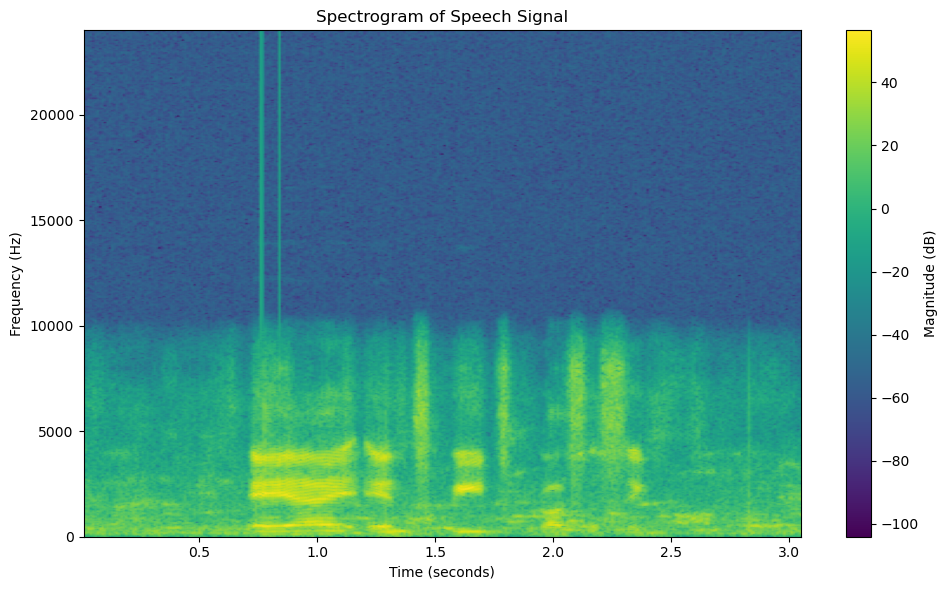

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wavfile
from scipy.signal import spectrogram

# Read the speech signal from a WAV file
sample_rate, speech_signal = wavfile.read('nikhil.wav')

# Define parameters for both methods
window_length_ms = 20  # milliseconds
window_length_samples = int(window_length_ms * sample_rate / 1000)  # convert milliseconds to samples
overlap_samples = window_length_samples // 2  # 50% overlap

# Compute the spectrogram using scipy.signal.spectrogram()
frequencies, times, spectrogram_data = spectrogram(speech_signal, fs=sample_rate, window='hann', nperseg=window_length_samples, noverlap=overlap_samples)

# Plot the spectrogram
plt.figure(figsize=(10, 6))
plt.pcolormesh(times, frequencies, 10 * np.log10(spectrogram_data), shading='gouraud')  # Use log scale for better visualization
plt.colorbar(label='Magnitude (dB)')
plt.title('Spectrogram of Speech Signal')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency (Hz)')
plt.tight_layout()
plt.show()

